In [7]:
import numpy as np
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
from util import *
from Functions import *
withllrs_modification=False
%matplotlib inline


### 1. Define the Standard Signals

In [8]:
ch, inv_ch, known_frames, carrier_indices = create_standard()

Creating known ofdm frame


### 2. Read the recorded sound file

In [10]:
# WAV
#rx_signal = sf.read("test_files/Team2/1.Through_Audio_Channel.m4a")[0]

# M4A
rx_signal = real_channel_response_file("test_files/Team2/1.Through_Audio_Channel.m4a")

#### 2.1 Optional  Add noise to the output

#### Remember to re-load file before adding noise again!!!

In [11]:
'''
power = np.mean(np.square(rx_signal))
snr = 1.3
rx_signal = awgn(rx_signal, noise_var = (power / snr))
'''

'\npower = np.mean(np.square(rx_signal))\nsnr = 1.3\nrx_signal = awgn(rx_signal, noise_var = (power / snr))\n'

### 3. Some useful plots

In [22]:
#rx_convolution_1, rx_convolution_2, peak_start, peak_end = matched_filter(rx_signal, inv_ch, ch)
offset = 20
freq_response, imp_response, rx_known_frames = channel_estimate(rx_signal, peak_start, known_frames, offset)

30.40110655574573


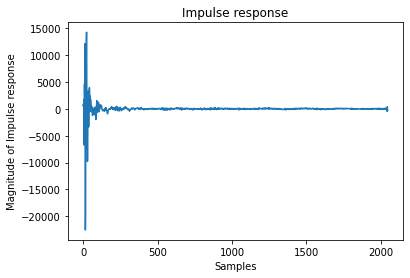

In [23]:
plt.title('Impulse response')
plt.xlabel('Samples')
plt.plot(imp_response - np.average(imp_response))
plt.ylabel('Magnitude of Impulse response')
print(impulse_score(imp_response))

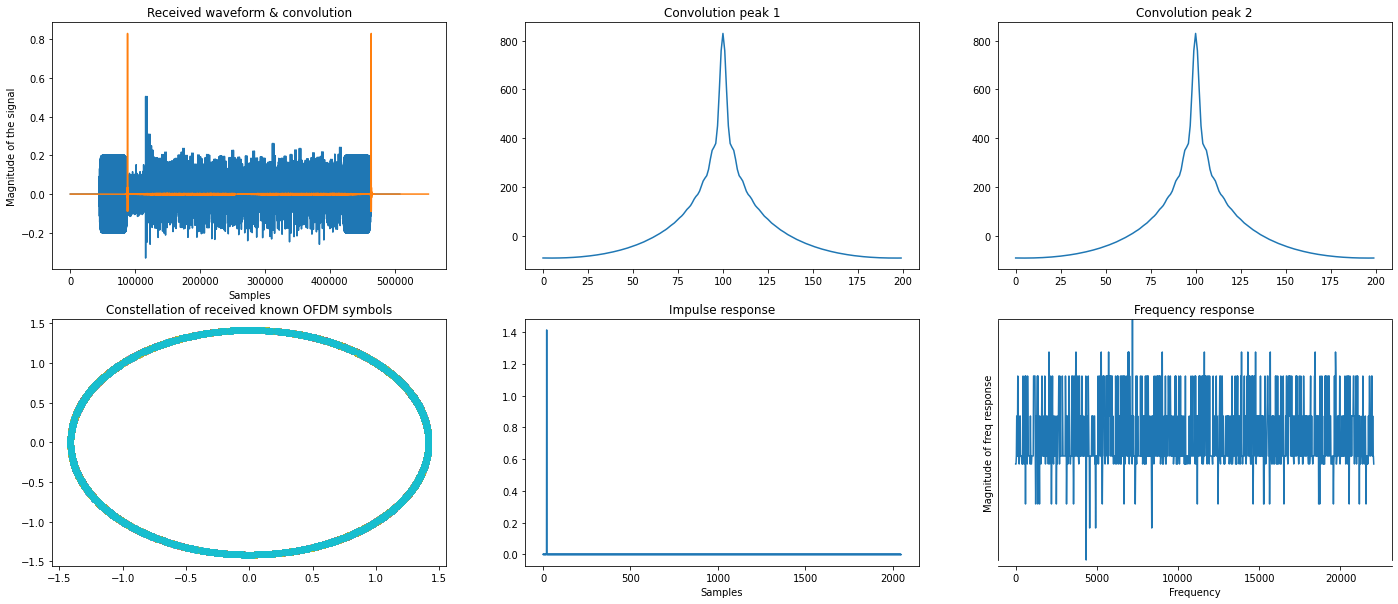

In [6]:
rx_convolution_1, rx_convolution_2, peak_start, peak_end = matched_filter(rx_signal, inv_ch, ch)
offset = 20
freq_response, imp_response, rx_known_frames = channel_estimate(rx_signal, peak_start, known_frames, offset)
figs, axs = plt.subplots(2, 3, figsize=(24,10))
axs[0][0].plot(rx_signal)
axs[0][0].set_title('Received waveform & convolution')
axs[0][0].plot(np.concatenate((rx_convolution_1[:-44100]/1000, rx_convolution_2/1000), axis=None))
axs[0][0].set_xlabel('Samples')
axs[0][0].set_ylabel('Magnitude of the signal')
axs[0][1].set_title('Convolution peak 1')
axs[0][1].plot(rx_convolution_1[peak_start-100:peak_start+100])
axs[0][2].set_title('Convolution peak 2')
axs[0][2].plot(rx_convolution_2[peak_end-100  - len(rx_signal)//2 :peak_end+100  - len(rx_signal)//2 ] )

for i in range(len(rx_known_frames)):
    tst_symbols = np.fft.fft(rx_known_frames[i][prefix_no:], N)[1:N//2]
    axs[1][0].scatter(np.real(tst_symbols), np.imag(tst_symbols), label=i)
axs[1][0].set_title('Constellation of received known OFDM symbols')

axs[1][1].set_title('Impulse response')
axs[1][1].set_xlabel('Samples')
axs[1][1].plot(imp_response)
axs[1][2].set_title('Frequency response')
axs[1][2].set_ylabel('Magnitude of freq response')
axs[1][2].set_xlabel('Frequency')
axs[1][2].semilogy(np.linspace(1, fs//2 -1, N//2-2), np.abs(freq_response[1:N//2-1]))

### 4. File decoding

#### Manual

In [7]:
bits_rec, imp_response = test(rx_signal, peak_start, peak_end, known_frames, inv_ch, carrier_indices, 30)

inside LDPC_decode_with_niceCKs
type(ys_)= <class 'numpy.ndarray'>
type(cks)= <class 'numpy.ndarray'>
about to ys_=ys_/ cks
ys_=ys_/ cks finished
about to do ys=separate_real_img(ys_)
about to do divide_codebits
about to loop
decoding 0th LDPC block, 71 in total tif= 2  txt= 0  wav= 0
file_type:  .tif

total_length:  134272  bits to decode.
file_length: 67136
decoding 69th LDPC block, 71 in totalreturn [LDPCstr_decoded,file_type] , please check you have two parameters ready before the = (e.g. decoded, filetype = LDPC_decode_....)

about to write file, the filename inputed is:  Decode/decode14_56.tif
bitstr written to  Decode/decode14_56.tif


Fine Tuning Block

In [23]:
bits_rec, best_imp_response = fine_tuning(rx_signal, peak_start, peak_end, known_frames, inv_ch, carrier_indices, withllrs_modification=withllrs_modification, find_range=30, offset=20)

Found best Offset: 47 Found best score: 35.35185084672167
inside LDPC_decode_with_niceCKs
type(ys_)= <class 'numpy.ndarray'>
type(cks)= <class 'numpy.ndarray'>
about to ys_=ys_/ cks
ys_=ys_/ cks finished
about to do ys=separate_real_img(ys_)
about to do divide_codebits
about to loop
decoding 0th LDPC block, 327 in total tif= 2  txt= 0  wav= 0
file_type:  .tif

total_length:  630496  bits to decode.
file_length: 315248
decoding 324th LDPC block, 327 in totalreturn [LDPCstr_decoded,file_type] , please check you have two parameters ready before the = (e.g. decoded, filetype = LDPC_decode_....)

about to write file, the filename inputed is:  Decode/decode19_48.tif
bitstr written to  Decode/decode19_48.tif


Text(0, 0.5, 'Magnitude of Impulse response')

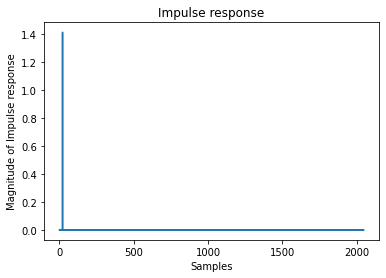

In [10]:
plt.title('Impulse response')
plt.xlabel('Samples')
plt.plot(imp_response)
plt.ylabel('Magnitude of Impulse response')

In [22]:
from PIL import Image
import numpy 

im = Image.open('Decode/decode19_45.tif') 
imarray = numpy.array(im) 
imarray.shape 
im.show()

/home/howard/.local/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


UnidentifiedImageError: cannot identify image file 'Decode/decode19_45.tif'

In [27]:
freq_response

array([ 1.75056204e+19   +0.j        , -2.32984181e+03 +457.57608397j,
       -2.74221789e+02+1250.80442172j, ...,
       -6.63862671e+02-2712.78523388j, -2.74221789e+02-1250.80442172j,
       -2.32984181e+03 -457.57608397j])